## Vietnam's Economic Growth Outlook


## Data description:
We collect the GDP growth data and the factors that affect economic growth in Vietnam from 1996 to 2023. The time series data are collected from World Bank database:
- **FDI inflows**: Foreign direct investment are the net inflows of investment to acquire a lasting management interest (10 percent or more of voting stock) in an enterprise operating in an economy other than that of the investor. It is the sum of equity capital, reinvestment of earnings, other long-term capital, and short-term capital as shown in the balance of payments. This series shows net inflows (new investment inflows less disinvestment) in the reporting economy from foreign investors, and is divided by GDP.
- **Exports of goods and services (BoP, current US$)**: Exports of goods and services comprise all transactions between residents of a country and the rest of the world involving a change of ownership from residents to nonresidents of general merchandise, net exports of goods under merchanting, nonmonetary gold, and services. Data are in current U.S. dollars. 
- **Gross fixed capital formation (constant 2015 US$)**: Gross fixed capital formation (formerly gross domestic fixed investment) includes land improvements (fences, ditches, drains, and so on); plant, machinery, and equipment purchases; and the construction of roads, railways, and the like, including schools, offices, hospitals, private residential dwellings, and commercial and industrial buildings. According to the 2008 SNA, net acquisitions of valuables are also considered capital forma
- **Gross fixed capital formation (annual % growth)**: Average annual growth of gross fixed capital formation based on constant local currency. Aggregates are based on constant 2015 prices, expressed in U.S. dollars. Gross fixed capital formation (formerly gross domestic fixed investment) includes land improvements (fences, ditches, drains, and so on); plant, machinery, and equipment purchases; and the construction of roads, railways, and the like, including schools, offices, hospitals, private residential dwellings, and commercial and industrial buildings. 

In [180]:
# Import libraries
import pandas as pd
import numpy as np
import os
import math
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [181]:
df = pd.read_csv("data.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28 entries, 0 to 27
Data columns (total 11 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   Year                                               28 non-null     int64  
 1   GDP (constant 2015 US$)                            28 non-null     float64
 2   GDP per capita (constant 2015 US$)                 28 non-null     float64
 3   GDP growth rate (%)                                28 non-null     float64
 4   FDI inflow (BoP, US$)                              28 non-null     int64  
 5   Export (BoP, US$)                                  28 non-null     float64
 6   Gross fixed capital formation (constant 2015 US$)  28 non-null     float64
 7   Gross capital formation growth (%)                 28 non-null     float64
 8   Gross fixed capital formation (% of GDP)           28 non-null     float64
 9   Final consum

In [182]:
# Convert to billion US
'''
df["GDP (constant 2015 US$)"] = (df["GDP (constant 2015 US$)"]/ 1000000000)
df["FDI inflow (BoP, US$)"] = (df["FDI inflow (BoP, US$)"] / 1000000000) 
df["Export (BoP, US$)"] = df["Export (BoP, US$)"] / 1000000000
df["Final consumption expenditure (constant 2015 US$)"] = df["Final consumption expenditure (constant 2015 US$)"] / 1000000000
'''

# Label the columns
gdp = df["GDP (constant 2015 US$)"]
gdp_growth = df["GDP growth rate (%)"]
gdp_per_capita = df["GDP per capita (constant 2015 US$)"]
fdi = df["FDI inflow (BoP, US$)"]
export = df["Export (BoP, US$)"]
capital = df["Gross fixed capital formation (constant 2015 US$)"]
capital_growth = df["Gross capital formation growth (%)"]
capital_share = df["Gross fixed capital formation (% of GDP)"]
consumption = df["Final consumption expenditure (constant 2015 US$)"]
year = df.Year
df

,Year,GDP (constant 2015 US$),GDP per capita (constant 2015 US$),GDP growth rate (%),"FDI inflow (BoP, US$)","Export (BoP, US$)",Gross fixed capital formation (constant 2015 US$),Gross capital formation growth (%),Gross fixed capital formation (% of GDP),Final consumption expenditure (constant 2015 US$),"Inflation, consumer prices (annual %)"
0,1996,7.307780e+10,998.924907,0.093400,2395000000,9.498000e+09,1.453541e+10,0.140058,0.263189,5.436740e+10,0.056750
1,1997,7.903516e+10,1064.778029,0.081521,2220000000,1.171500e+10,1.601260e+10,0.101627,0.266989,5.749536e+10,0.032095
2,1998,8.359111e+10,1110.112677,0.057645,1671000000,1.197700e+10,1.799988e+10,0.124107,0.270212,6.000444e+10,0.072662
3,1999,8.758140e+10,1148.044652,0.047736,1412000000,1.403300e+10,1.828377e+10,0.015772,0.257035,6.116162e+10,0.041171
4,2000,9.352583e+10,1212.196578,0.067873,1298000000,1.715000e+10,2.014513e+10,0.101804,0.276468,6.313117e+10,-0.017103
5,2001,9.931778e+10,1273.805269,0.061929,1300000000,1.783700e+10,2.230449e+10,0.107190,0.291507,6.605603e+10,-0.004315
6,2002,1.060000e+11,1340.516705,0.063208,1400000000,1.965400e+10,2.517372e+10,0.128639,0.311385,7.098036e+10,0.038308
7,2003,1.130000e+11,1418.743375,0.068991,1450000000,2.342100e+10,2.816989e+10,0.119020,0.333540,7.662211e+10,0.032346
8,2004,1.210000e+11,1510.944490,0.075364,1610000000,3.035200e+10,3.111119e+10,0.104413,0.332540,8.209701e+10,0.077549
9,2005,1.310000e+11,1609.962683,0.075472,1954000000,3.662300e+10,3.414481e+10,0.097509,0.312736,8.811462e+10,0.082846


In [183]:
df.describe()

,Year,GDP (constant 2015 US$),GDP per capita (constant 2015 US$),GDP growth rate (%),"FDI inflow (BoP, US$)","Export (BoP, US$)",Gross fixed capital formation (constant 2015 US$),Gross capital formation growth (%),Gross fixed capital formation (% of GDP),Final consumption expenditure (constant 2015 US$),"Inflation, consumer prices (annual %)"
count,28.000000,2.800000e+01,28.000000,28.000000,2.800000e+01,2.800000e+01,2.800000e+01,28.000000,28.000000,2.800000e+01,28.000000
mean,2009.500000,1.917189e+11,2127.859223,0.063867,7.959536e+09,1.270367e+11,5.707155e+10,0.084838,0.303073,1.313854e+11,0.056823
std,8.225975,9.335917e+10,843.857220,0.014480,5.972392e+09,1.213129e+11,3.366712e+10,0.051660,0.024565,6.222216e+10,0.051652
min,1996.000000,7.307780e+10,998.924907,0.025537,1.298000e+09,9.498000e+09,1.453541e+10,-0.047737,0.257035,5.436740e+10,-0.017103
25%,2002.750000,1.112500e+11,1399.186708,0.056347,1.883250e+09,2.247925e+10,2.742085e+10,0.053600,0.285907,7.521167e+10,0.031963
50%,2009.500000,1.720000e+11,1977.358058,0.065566,7.800000e+09,7.469400e+10,5.407396e+10,0.097754,0.303842,1.200000e+11,0.039577
75%,2016.250000,2.595000e+11,2753.718356,0.071869,1.297500e+10,1.987500e+11,8.150515e+10,0.105548,0.312962,1.810000e+11,0.075022
max,2023.000000,3.770000e+11,3760.397714,0.093400,1.850000e+10,3.850000e+11,1.210000e+11,0.241572,0.351597,2.470000e+11,0.231154


In [184]:
# Create the output folder
output_folder = "Output"
os.makedirs(output_folder, exist_ok=True)

# Define the plot
plt.figure(figsize=(10, 5))
plt.plot(year, gdp, linestyle='-', color='b')	
plt.title("GDP (Billion US$)")
plt.xlabel("Year")
plt.ylabel("Billion US ($)")
plt.grid(True)

# Save the plot
plot_path = os.path.join(output_folder, "gdp.png")
plt.savefig(plot_path, dpi=300, bbox_inches='tight')
plt.close()  # Close the figure to free memory

print(f"Plot saved at: {plot_path}")

Plot saved at: Output\gdp.png


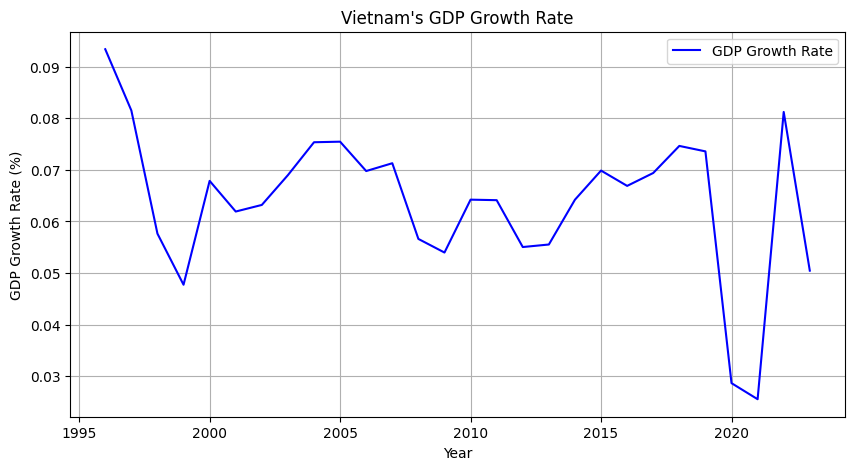

Plot saved at: Output\gdp_growth_rate.png


In [185]:
# Plot GDP Growth Rate
plt.figure(figsize=(10,5))
plt.plot(df["Year"], df["GDP growth rate (%)"], linestyle='-', color='b', label="GDP Growth Rate")#
#plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel("Year")
plt.ylabel("GDP Growth Rate (%)")
plt.title("Vietnam's GDP Growth Rate")
plt.legend()
plt.grid()
plt.show()

# Save the plot
plot_path = os.path.join(output_folder, "gdp_growth_rate.png")
plt.savefig(plot_path, dpi=300, bbox_inches='tight')
plt.close()  # Close the figure to free memory

print(f"Plot saved at: {plot_path}")

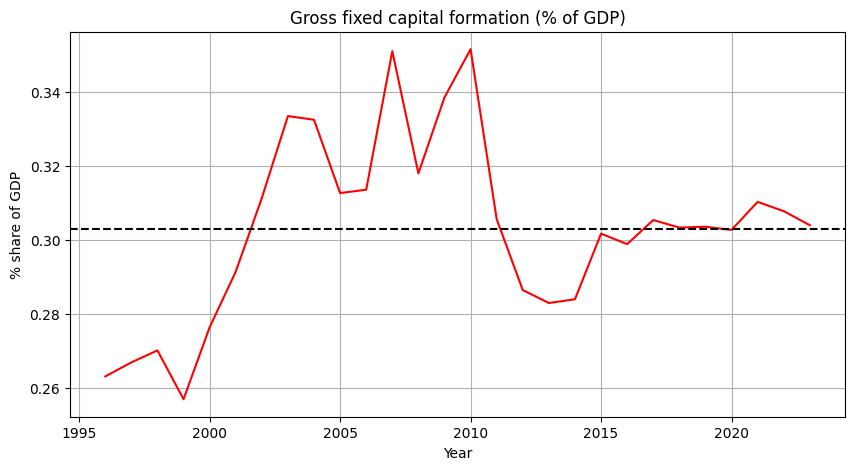

Plot saved at: Output\capital_share.png


In [186]:
# Define the plot
plt.figure(figsize=(10, 5))
plt.plot(year, capital_share, linestyle='-', color='r')
plt.axhline(y=0.303073, color='black', linestyle='--') # Add the horizontal line of average capital formation share
plt.title("Gross fixed capital formation (% of GDP)")
plt.xlabel("Year")
#plt.ylim(bottom=0, top=1)
plt.ylabel("% share of GDP")
plt.grid(True)

# Save the plot
plot_path = os.path.join(output_folder, "capital_share.png")
plt.savefig(plot_path, dpi=300, bbox_inches='tight')
plt.show()  # Close the figure to free memory

print(f"Plot saved at: {plot_path}")

In [187]:
# Plot Capital Formation & GDP Growth
fig, ax1 = plt.subplots(figsize=(10,5))

ax1.set_xlabel("Year")
ax1.set_ylabel("Gross Capital Formation Growth (%)", color="tab:blue")
ax1.plot(df["Year"], df["Gross capital formation growth (%)"], linestyle="-", color="tab:blue", label="Capital Formation Growth")
ax1.tick_params(axis="y", labelcolor="tab:blue")

ax2 = ax1.twinx()
ax2.set_ylabel("GDP Growth Rate (%)", color="tab:green")
ax2.plot(df["Year"], df["GDP growth rate (%)"], linestyle="--", color="tab:green", label="GDP Growth Rate")
ax2.tick_params(axis="y", labelcolor="tab:green")

fig.suptitle("Vietnam: Capital Formation & GDP Growth")
fig.tight_layout()

# Save the plot
plot_path = os.path.join(output_folder, "capital_growth.png")
plt.savefig(plot_path, dpi=300, bbox_inches='tight')
plt.close()  # Close the figure to free memory

print(f"Plot saved at: {plot_path}")

Plot saved at: Output\capital_growth.png


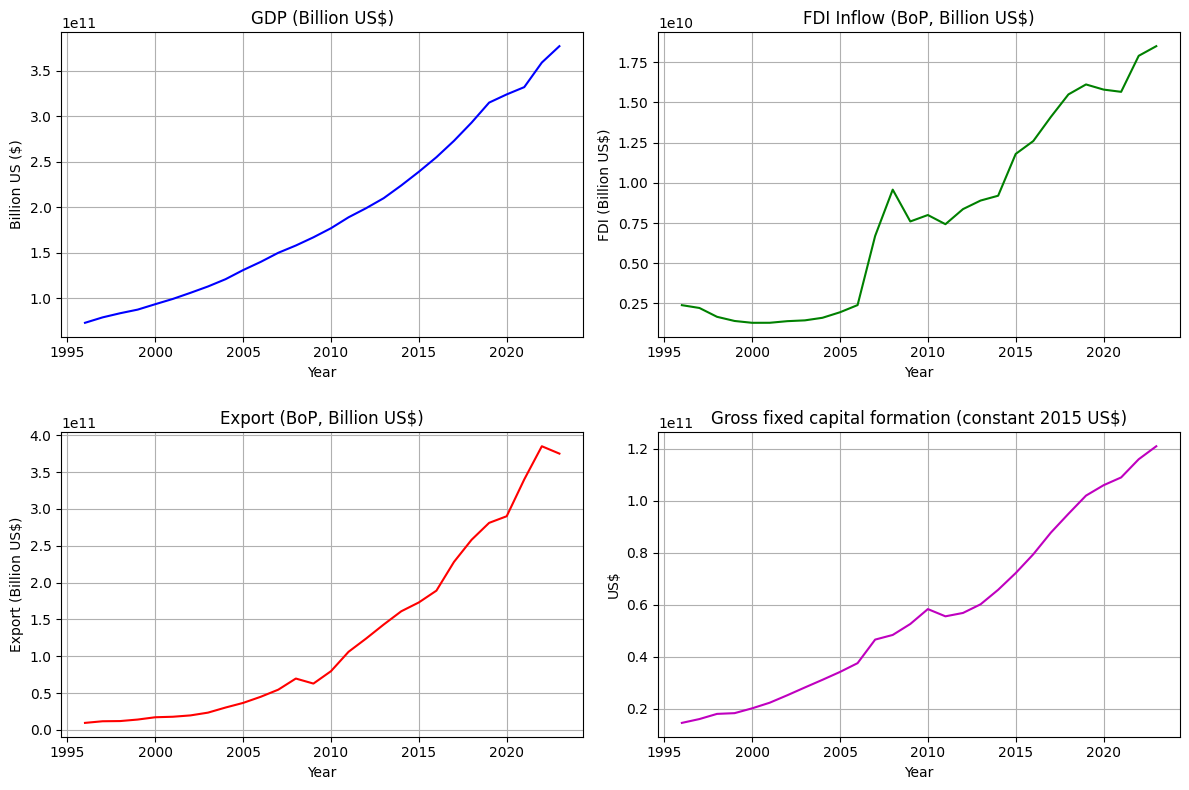

In [188]:
# Plot the indicators
# Create a 2x2 subplot
fig, axes = plt.subplots(2, 2, figsize=(12, 8))

# Plot GDP growth rate
axes[0, 0].plot(year, gdp, linestyle='-', color='b')
axes[0, 0].set_title("GDP (Billion US$)")
axes[0, 0].set_xlabel("Year")
axes[0, 0].set_ylabel("Billion US ($)")
axes[0, 0].grid(True)

# Plot FDI inflow
axes[0, 1].plot(year, fdi, linestyle='-', color='g')
axes[0, 1].set_title("FDI Inflow (BoP, Billion US$)")
axes[0, 1].set_xlabel("Year")
axes[0, 1].set_ylabel("FDI (Billion US$)")
axes[0, 1].grid(True)

# Plot Export
axes[1, 0].plot(year, export, linestyle='-', color='r')
axes[1, 0].set_title("Export (BoP, Billion US$)")
axes[1, 0].set_xlabel("Year")
axes[1, 0].set_ylabel("Export (Billion US$)")
axes[1, 0].grid(True)

# Plot Gross Capital Formation Growth
axes[1, 1].plot(year, capital, linestyle='-', color='m')
axes[1, 1].set_title("Gross fixed capital formation (constant 2015 US$)")
axes[1, 1].set_xlabel("Year")
axes[1, 1].set_ylabel("US$")
axes[1, 1].grid(True)

# Adjust layout and show plot
plt.tight_layout()
plt.show()


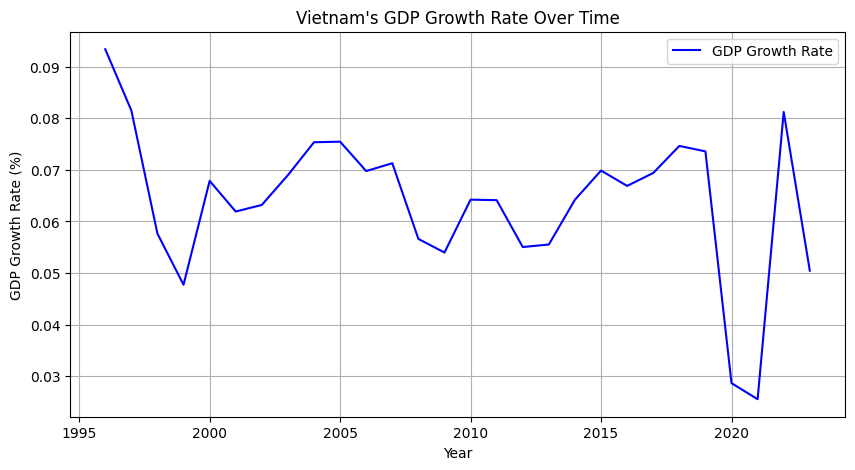

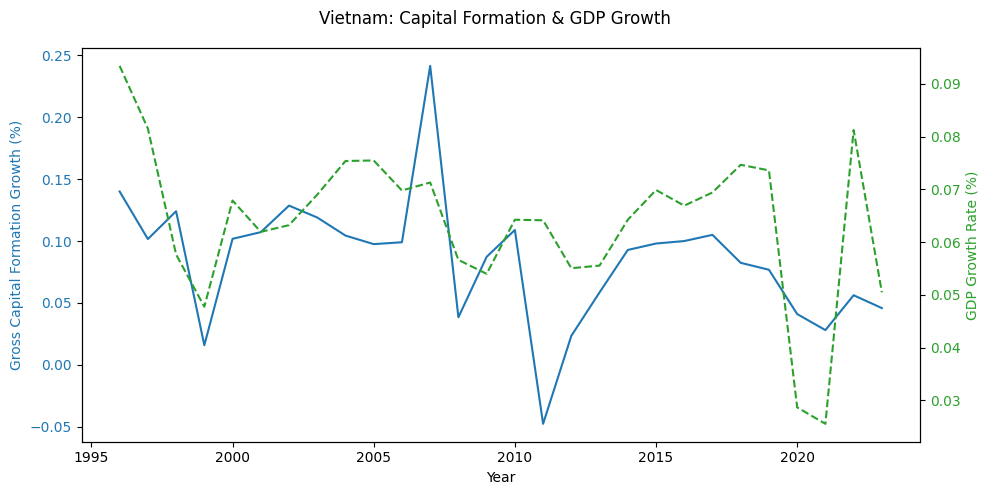

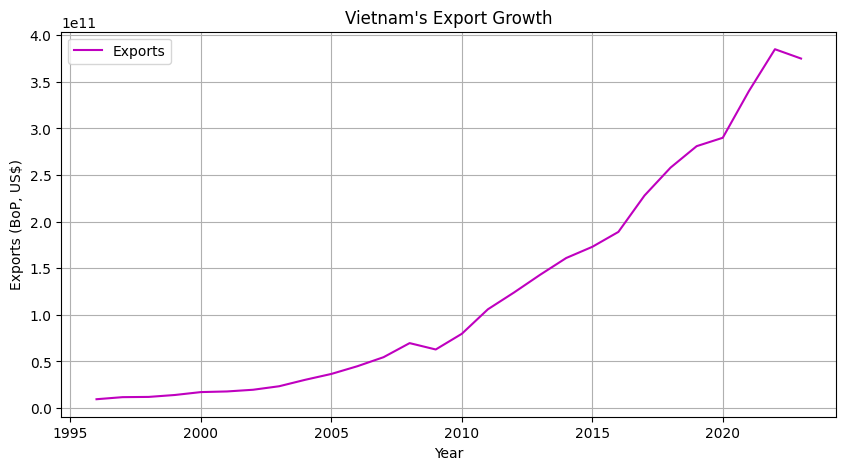

In [189]:
import pandas as pd
import matplotlib.pyplot as plt

# Load Vietnam's economic data
data = pd.read_csv("data.csv")

# Convert Year column to integer
data["Year"] = data["Year"].astype(int)

# Plot GDP Growth Rate
plt.figure(figsize=(10,5))
plt.plot(data["Year"], data["GDP growth rate (%)"], linestyle='-', color='b', label="GDP Growth Rate")#
#plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel("Year")
plt.ylabel("GDP Growth Rate (%)")
plt.title("Vietnam's GDP Growth Rate Over Time")
plt.legend()
plt.grid()
plt.show()

# Plot Capital Formation & GDP Growth
fig, ax1 = plt.subplots(figsize=(10,5))

ax1.set_xlabel("Year")
ax1.set_ylabel("Gross Capital Formation Growth (%)", color="tab:blue")
ax1.plot(data["Year"], data["Gross capital formation growth (%)"], linestyle="-", color="tab:blue", label="Capital Formation Growth")
ax1.tick_params(axis="y", labelcolor="tab:blue")

ax2 = ax1.twinx()
ax2.set_ylabel("GDP Growth Rate (%)", color="tab:green")
ax2.plot(data["Year"], data["GDP growth rate (%)"], linestyle="--", color="tab:green", label="GDP Growth Rate")
ax2.tick_params(axis="y", labelcolor="tab:green")

fig.suptitle("Vietnam: Capital Formation & GDP Growth")
fig.tight_layout()
plt.show()

# Plot Export Growth
plt.figure(figsize=(10,5))
plt.plot(data["Year"], data["Export (BoP, US$)"], linestyle='-', color='m', label="Exports")
plt.xlabel("Year")
plt.ylabel("Exports (BoP, US$)")
plt.title("Vietnam's Export Growth")
plt.legend()
plt.grid()
plt.show()


In [190]:
# Create a variable 'X' to be the independent variable of the OLS model. Do not add a constant to X
X = df[["FDI inflow (BoP, US$)", "Export (BoP, US$)", 
        "Gross fixed capital formation (constant 2015 US$)", 
        "Final consumption expenditure (constant 2015 US$)"]]

# Create a variable 'Y' to be the dependent variable of the OLS model.
Y = df["GDP (constant 2015 US$)"]

# Create a variable called 'model' that initializes the OLS model
model = sm.OLS(Y,X)

# Create a variable called 'results' that stores the results of the estimated OLS model
results = model.fit()

# Print output of summary() method of results
print(results.summary())

                                   OLS Regression Results                                   
Dep. Variable:     GDP (constant 2015 US$)   R-squared (uncentered):                   1.000
Model:                                 OLS   Adj. R-squared (uncentered):              1.000
Method:                      Least Squares   F-statistic:                          4.107e+04
Date:                     Sun, 02 Mar 2025   Prob (F-statistic):                    1.23e-45
Time:                             16:33:47   Log-Likelihood:                         -646.39
No. Observations:                       28   AIC:                                      1301.
Df Residuals:                           24   BIC:                                      1306.
Df Model:                                4                                                  
Covariance Type:                 nonrobust                                                  
                                                        coef    std er

## Stochastic Growth Function

In [191]:
# Define a function that estimates the Solow model using actual economic data
def solow_stochastic(s, alpha, delta, df, rho, sigma):
    """
    Estimates the Solow growth model using real-world economic data.
    
    Args:
        s (float):      Savings rate
        alpha (float):  Capital share in Cobb-Douglas production function
        delta (float):  Capital depreciation rate
        df (DataFrame): DataFrame containing real economic data
        rho (float):    AR coefficient for log A[t]
        sigma (float):  Standard deviation of shock to log A[t]
    
    Returns:
        DataFrame: A DataFrame with estimated deviations from steady-state levels.
    """

    # Extract relevant variables from the data
    capital = df["Gross fixed capital formation (constant 2015 US$)"].values
    output = df["GDP (constant 2015 US$)"].values
    consumption = df["Final consumption expenditure (constant 2015 US$)"].values
    investment = s * output  # Assuming investment is a fraction of GDP
    years = df["Year"].values
    T = len(years)

    # Initialize TFP using a Cobb-Douglas assumption: A = Y / K^alpha
    tfp = output / (capital ** alpha)

    # Initialize the shock process
    epsilon = np.random.normal(scale=sigma, size=T)

    # Iterate to estimate capital and TFP over time
    for t in range(1, T):
        capital[t] = s * tfp[t-1] * (capital[t-1] ** alpha) + (1 - delta) * capital[t-1]
        tfp[t] = np.exp(rho * np.log(tfp[t-1]) + epsilon[t])

    # Compute steady-state values
    capital_ss = (s / delta) ** (1 / (1 - alpha))
    tfp_ss = 1
    output_ss = tfp_ss * capital_ss ** alpha
    consumption_ss = (1 - s) * output_ss
    investment_ss = s * output_ss

    # Construct a DataFrame with deviations from the steady state
    df_results = pd.DataFrame({
        "Year": years,
        "output_log_dev": np.log(output / output_ss),
        "consumption_log_dev": np.log(consumption / consumption_ss),
        "investment_log_dev": np.log(investment / investment_ss),
        "capital_log_dev": np.log(capital / capital_ss),
        "tfp_log_dev": np.log(tfp / tfp_ss)
    })

    return df_results

# Example usage with real data
solow_results = solow_stochastic(s=0.2, alpha=0.3, delta=0.05, df=df, rho=0.9, sigma=0.02)
print(solow_results.head())

   Year  output_log_dev  consumption_log_dev  investment_log_dev  \
0  1996       24.420664            24.348048           24.420664   
1  1997       24.499033            24.403987           24.499033   
2  1998       24.555077            24.446702           24.555077   
3  1999       24.601708            24.465803           24.601708   
4  2000       24.667377            24.497498           24.667377   

   capital_log_dev  tfp_log_dev  
0        21.419433    17.994834  
1        22.090086    16.223408  
2        22.145475    14.589267  
3        22.115092    13.132440  
4        22.068815    11.820804  


## Total Factor Productivity ($A_t$)

## Simulate the Stochastic Solow Model

In [192]:
# Set parameters for simulation
alpha=0.35
s = 0.1
delta = 0.025
k0 = 8.43
A0 = 1
T = 201

np.random.seed(126)
# Simulate the model and store output in a variable called 'solow_df'
solow_df = solow_stochastic(s,alpha,delta,k0,A0,rho,sigma,T)

# Plot
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
solow_df.plot(ax=ax,grid=True)
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

NameError: name 'rho' is not defined